In [1]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
import pandas as pd
import string

from sklearn.utils import shuffle

import re
#from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

import csv 
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
data = pd.read_csv('combined_.csv')
#data = shuffle(data)

raw_tweets = data.content
tweets_date = data.date
tweets_user = data.user

tweets_location = [] 

for data in tweets_user: 
    loc = ast.literal_eval(data)
    tweets_location.append(loc.get("location"))
    

NameError: ignored

In [ ]:
print(tweets_user[1])
print(raw_tweets[1])
print(tweets_date[1])
print(tweets_location[1])

{'username': 'AmericaDialogue', 'displayname': 'The American Dialogue', 'id': 247048347, 'description': 'FEBRUARY 24, MMXXI | Responsibility & Accountability | #NeverForget January 6, 2021 | #Healthcare | #COVID19', 'rawDescription': 'FEBRUARY 24, MMXXI | Responsibility & Accountability | #NeverForget January 6, 2021 | #Healthcare | #COVID19', 'descriptionUrls': [], 'verified': False, 'created': '2011-02-04T00:11:20+00:00', 'followersCount': 29153, 'friendsCount': 29256, 'statusesCount': 47216, 'favouritesCount': 2685, 'listedCount': 67, 'mediaCount': 3112, 'location': 'United States of America', 'protected': False, 'linkUrl': 'https://www.the-americandialogue.com/', 'linkTcourl': 'https://t.co/OSAFCIKBgC', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1364243513974513664/khrOkiDj_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/247048347/1614107467', 'url': 'https://twitter.com/AmericaDialogue'}
.@ABC's broadcast: LIVE: Our @ABC News team has the late

In [ ]:
def clean_texts(data):
    
    #data = data.replace("[^a-zA-Z#]", " ")
    
    # remove any links
    data = re.sub(r'https://\S+', '', data)
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    
    # casefolding and removing punctuations and special chars
    data = data.lower()
    data = re.sub(r"([^a-zA-Z#\s])", '', data)
    
    # tokenise
    data = word_tokenize(data)

    return data

In [ ]:
clean_tweets = [' '.join(clean_texts(text)) for text in raw_tweets]
print(clean_tweets[0])

if the doesnt approve this emerg use then should not approve it either only effective


In [ ]:
all_stopwords = stopwords.words('english')

# add more words?
stopwo = ['new', 'news', 'broadcast', '.', '\'s', ':'] 
for words in stopwo: 
    all_stopwords.append(words)

In [ ]:
def remove_stopwords(data):
    
    data = word_tokenize(data)
    # remove stopwords
    data = [word for word in data if not word in stopwords.words()]

    return data
 

In [ ]:
cleaner_tweets = [' '.join(remove_stopwords(text)) for text in clean_tweets]


In [ ]:
cleaner_tweets[14]

'premier jason kenney provides update covid vaccines alberta live'

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def process(text):
    sentence = [] 
    for word in text.split():
        word = lemmatizer.lemmatize(word)
        if not(word.endswith('e')):
                word = stemmer.stem(word)
        sentence.append(word)
    return sentence
    

In [ ]:
processed_tweets = [' '.join(process(text)) for text in cleaner_tweets]
print(processed_tweets[14])

premier jason kenney provid update covid vaccine alberta live
dr fauci received israeli award speaking truth power politicized covid crisis ask call israel share vaccine supply palestinians


In [ ]:
data = {'Processed': processed_tweets, 
        'Raw': raw_tweets,
        'Date': tweets_date,
        'Location': tweets_location} 
df = pd.DataFrame(data) 

df.to_csv('processed_tweets.csv')

In [ ]:
df.head()
df.tail()

,Processed,Raw,Date,Location
60770,florida governor shock state pull covid vaccin...,https://t.co/M92sw0V2ns Florida Governor shoc...,2021-02-18 20:44:24+00:00,United Kingdom
60771,expect vaccine covid variantscovid forev ever ...,*****NOW WE CAN EXPECT MORE VACCINES FOR THE C...,2021-02-18 20:44:23+00:00,"Wisconsin, USA"
60772,dr b build free nationwide covid standbi list ...,Dr. B is building a free nationwide COVID-19 #...,2021-02-18 20:44:20+00:00,"Portland, OR"
60773,clinic trial indicate india vaccine effective ...,Clinical trials indicate India’s vaccines will...,2021-02-18 20:44:17+00:00,"California, USA"
60774,taken first dose covid vaccine parson say sign...,. @GovParsonMO and @FirstLadyTeresa have taken...,2021-02-18 20:44:06+00:00,"Richmond Heights, MO"


In [ ]:
df_clean = pd.read_csv('combined&processed_tweets.csv',
                 lineterminator='\n')
df_clean.tail()

,Unnamed: 0,Processed,Raw,Date,Location
60770,60770,florida governor shock state pull covid vaccin...,https://t.co/M92sw0V2ns Florida Governor shoc...,2021-02-18 20:44:24+00:00,United Kingdom
60771,60771,expect vaccine covid variantscovid forev ever ...,*****NOW WE CAN EXPECT MORE VACCINES FOR THE C...,2021-02-18 20:44:23+00:00,"Wisconsin, USA"
60772,60772,dr b build free nationwide covid standbi list ...,Dr. B is building a free nationwide COVID-19 #...,2021-02-18 20:44:20+00:00,"Portland, OR"
60773,60773,clinic trial indicate india vaccine effective ...,Clinical trials indicate India’s vaccines will...,2021-02-18 20:44:17+00:00,"California, USA"
60774,60774,taken first dose covid vaccine parson say sign...,. @GovParsonMO and @FirstLadyTeresa have taken...,2021-02-18 20:44:06+00:00,"Richmond Heights, MO"


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df_clean.shape

(60775, 5)

In [ ]:
df_new = df_clean[df_clean['Processed'].notnull()]
df_new

,Unnamed: 0,Processed,Raw,Date,Location
0,0,doesnt approve emerg use approve either effective,@KSL5TV If the @US_FDA doesn’t approve this em...,2021-02-19 23:59:58+00:00,USA 🇺🇸
1,1,broadcast live news team latest coronavirus pa...,.@ABC's broadcast: LIVE: Our @ABC News team ha...,2021-02-19 23:59:56+00:00,United States of America
2,2,thought covid vaccine lead antibodi induc misc...,Thoughts on the covid vaccines leading to anti...,2021-02-19 23:59:55+00:00,NaN
3,3,continue work toward make sure patient access ...,We will continue to work towards making sure t...,2021-02-19 23:59:55+00:00,"Cleveland, OH"
4,4,shot arm infect prevent consider covid vaccine...,A Shot In the Arm - Infection prevention consi...,2021-02-19 23:59:44+00:00,"Atlanta, GA"
...,...,...,...,...,...
60770,60770,florida governor shock state pull covid vaccin...,https://t.co/M92sw0V2ns Florida Governor shoc...,2021-02-18 20:44:24+00:00,United Kingdom
60771,60771,expect vaccine covid variantscovid forev ever ...,*****NOW WE CAN EXPECT MORE VACCINES FOR THE C...,2021-02-18 20:44:23+00:00,"Wisconsin, USA"
60772,60772,dr b build free nationwide covid standbi list ...,Dr. B is building a free nationwide COVID-19 #...,2021-02-18 20:44:20+00:00,"Portland, OR"
60773,60773,clinic trial indicate india vaccine effective ...,Clinical trials indicate India’s vaccines will...,2021-02-18 20:44:17+00:00,"California, USA"


In [ ]:
df1_new = df_new
df2_new = df_new

In [ ]:
wordcount = df_new['Raw'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus before any processing.".format(wordcount))

wordcount = df_new['Processed'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after pre-processing.".format(wordcount))

There are 1453183 words in the corpus before any processing.
There are 772001 words in the corpus after pre-processing.


In [ ]:
df_new.Raw.str.split(expand=True).stack().value_counts()

the                        47234
to                         38990
vaccine                    31621
of                         26328
COVID-19                   19701
                           ...  
https://t.co/Wzgjt1r6H8        1
https://t.co/jlPUrseyp8        1
https://t.co/gnzJmlEV1z        1
Gurrl                          1
vaccd                          1
Length: 159051, dtype: int64

In [ ]:
df_new.Processed.str.split(expand=True).stack().value_counts()

vaccine        58250
covid          37047
coronavirus    14135
get             9328
people          5075
               ...  
ampyour            1
intezsar           1
tsitsipa           1
avidar             1
vaccd              1
Length: 30237, dtype: int64

In [ ]:
%cd content/drive/MyDrive/


[Errno 2] No such file or directory: 'content/drive/MyDrive/'
/content/drive/MyDrive


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df2_new['scores'] = df2_new['Processed'].apply(lambda Description: sid.polarity_scores(Description))
df2_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Processed,Raw,Date,Location,scores
0,0,doesnt approve emerg use approve either effective,@KSL5TV If the @US_FDA doesn’t approve this em...,2021-02-19 23:59:58+00:00,USA 🇺🇸,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."
1,1,broadcast live news team latest coronavirus pa...,.@ABC's broadcast: LIVE: Our @ABC News team ha...,2021-02-19 23:59:56+00:00,United States of America,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,thought covid vaccine lead antibodi induc misc...,Thoughts on the covid vaccines leading to anti...,2021-02-19 23:59:55+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,continue work toward make sure patient access ...,We will continue to work towards making sure t...,2021-02-19 23:59:55+00:00,"Cleveland, OH","{'neg': 0.095, 'neu': 0.591, 'pos': 0.314, 'co..."
4,4,shot arm infect prevent consider covid vaccine...,A Shot In the Arm - Infection prevention consi...,2021-02-19 23:59:44+00:00,"Atlanta, GA","{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp..."


In [ ]:
df2_new['compound'] = df2_new['scores'].apply(lambda score_dict: score_dict['compound'])
df2_new['sentiment_type']=''
df2_new.loc[df2_new.compound>0,'sentiment_type']='POSITIVE'
df2_new.loc[df2_new.compound==0,'sentiment_type']='NEUTRAL'
df2_new.loc[df2_new.compound<0,'sentiment_type']='NEGATIVE'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
df2_new

,Unnamed: 0,Processed,Raw,Date,Location,scores,compound,sentiment_type
0,0,doesnt approve emerg use approve either effective,@KSL5TV If the @US_FDA doesn’t approve this em...,2021-02-19 23:59:58+00:00,USA 🇺🇸,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.4767,POSITIVE
1,1,broadcast live news team latest coronavirus pa...,.@ABC's broadcast: LIVE: Our @ABC News team ha...,2021-02-19 23:59:56+00:00,United States of America,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,2,thought covid vaccine lead antibodi induc misc...,Thoughts on the covid vaccines leading to anti...,2021-02-19 23:59:55+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,3,continue work toward make sure patient access ...,We will continue to work towards making sure t...,2021-02-19 23:59:55+00:00,"Cleveland, OH","{'neg': 0.095, 'neu': 0.591, 'pos': 0.314, 'co...",0.5859,POSITIVE
4,4,shot arm infect prevent consider covid vaccine...,A Shot In the Arm - Infection prevention consi...,2021-02-19 23:59:44+00:00,"Atlanta, GA","{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",0.0258,POSITIVE
...,...,...,...,...,...,...,...,...
60770,60770,florida governor shock state pull covid vaccin...,https://t.co/M92sw0V2ns Florida Governor shoc...,2021-02-18 20:44:24+00:00,United Kingdom,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...",-0.3818,NEGATIVE
60771,60771,expect vaccine covid variantscovid forev ever ...,*****NOW WE CAN EXPECT MORE VACCINES FOR THE C...,2021-02-18 20:44:23+00:00,"Wisconsin, USA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
60772,60772,dr b build free nationwide covid standbi list ...,Dr. B is building a free nationwide COVID-19 #...,2021-02-18 20:44:20+00:00,"Portland, OR","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.5106,POSITIVE
60773,60773,clinic trial indicate india vaccine effective ...,Clinical trials indicate India’s vaccines will...,2021-02-18 20:44:17+00:00,"California, USA","{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,POSITIVE


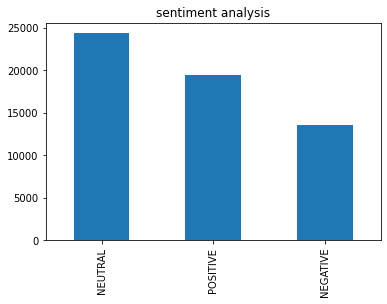

In [ ]:
df2_new.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [ ]:
dfpos = df2_new[df2_new['sentiment_type'] == 'POSITIVE']

In [ ]:
dfpos

,Unnamed: 0,Processed,Raw,Date,Location,scores,compound,sentiment_type
0,0,doesnt approve emerg use approve either effective,@KSL5TV If the @US_FDA doesn’t approve this em...,2021-02-19 23:59:58+00:00,USA 🇺🇸,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.4767,POSITIVE
3,3,continue work toward make sure patient access ...,We will continue to work towards making sure t...,2021-02-19 23:59:55+00:00,"Cleveland, OH","{'neg': 0.095, 'neu': 0.591, 'pos': 0.314, 'co...",0.5859,POSITIVE
4,4,shot arm infect prevent consider covid vaccine...,A Shot In the Arm - Infection prevention consi...,2021-02-19 23:59:44+00:00,"Atlanta, GA","{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",0.0258,POSITIVE
5,5,bright side people famili gotten vaccine round...,on the bright side 3 people in my family have ...,2021-02-19 23:59:43+00:00,NaN,"{'neg': 0.1, 'neu': 0.762, 'pos': 0.138, 'comp...",0.2023,POSITIVE
6,6,unprotect african health worker rich countri b...,Unprotected African health workers die as rich...,2021-02-19 23:59:42+00:00,Riyadh,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.5574,POSITIVE
...,...,...,...,...,...,...,...,...
60762,60762,vaccine efficaci mild moderate covid case well...,"""The vaccine’s efficacy against mild and moder...",2021-02-18 20:44:52+00:00,NaN,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.2732,POSITIVE
60766,60766,join march pm webinar latest data covid vaccin...,Join me and @PosAware on March 4 at 4pm ET for...,2021-02-18 20:44:42+00:00,Earth,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.2960,POSITIVE
60769,60769,intern student get covid vaccine free australia,@SpokespersonCHN International students will g...,2021-02-18 20:44:29+00:00,NaN,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.5106,POSITIVE
60772,60772,dr b build free nationwide covid standbi list ...,Dr. B is building a free nationwide COVID-19 #...,2021-02-18 20:44:20+00:00,"Portland, OR","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.5106,POSITIVE


In [ ]:
dfneg = df2_new[df2_new['sentiment_type'] == 'NEGATIVE']

In [ ]:
dfneg

,Unnamed: 0,Processed,Raw,Date,Location,scores,compound,sentiment_type
11,11,learn covid vaccine part virus ive bad experie...,I learned that the Covid vaccines have no part...,2021-02-19 23:59:33+00:00,Indiana USA,"{'neg': 0.251, 'neu': 0.497, 'pos': 0.251, 'co...",-0.2500,NEGATIVE
19,19,serious wtf wrong people two woman dress grann...,Seriously? Wtf is wrong with people???\n\nTwo ...,2021-02-19 23:59:17+00:00,"Chicago, IL","{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'comp...",-0.8020,NEGATIVE
21,21,mock covid mask wear still got vaccine mom liar,"@Jim_Jordan You mocked Covid-19, mask wearing ...",2021-02-19 23:59:12+00:00,"Dallas, TX","{'neg': 0.466, 'neu': 0.534, 'pos': 0.0, 'comp...",-0.7269,NEGATIVE
23,23,covid vaccine kill people ivi league doctor,covid 19 vaccine killing people from Ivy Leagu...,2021-02-19 23:59:11+00:00,United States,"{'neg': 0.439, 'neu': 0.561, 'pos': 0.0, 'comp...",-0.6908,NEGATIVE
25,25,covid vaccine g increase support covax scheme ...,Covid vaccines: G7 increase support for Covax ...,2021-02-19 23:59:02+00:00,Everywhere,"{'neg': 0.263, 'neu': 0.507, 'pos': 0.23, 'com...",-0.1779,NEGATIVE
...,...,...,...,...,...,...,...,...
60750,60750,u work double time make covid vaccine weather ...,US will have to work double time to make up fo...,2021-02-18 20:45:19+00:00,NaN,"{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",-0.3182,NEGATIVE
60765,60765,hey dbh thought article still subscrib made bc...,"Hey DBH and ⁦@adriandix⁩, thoughts on this art...",2021-02-18 20:44:48+00:00,"British Columbia, Canada","{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'comp...",-0.8176,NEGATIVE
60767,60767,france commit donate secur covid vaccine suppl...,France is committing to donate 5% of its secur...,2021-02-18 20:44:40+00:00,NaN,"{'neg': 0.15, 'neu': 0.719, 'pos': 0.132, 'com...",-0.0772,NEGATIVE
60768,60768,good news alloc covid vaccine dos head louisia...,GOOD NEWS: Allocation of Covid-19 Vaccine dose...,2021-02-18 20:44:39+00:00,"Baton Rouge, LA","{'neg': 0.289, 'neu': 0.607, 'pos': 0.104, 'co...",-0.6369,NEGATIVE


In [ ]:
dfntl = df2_new[df2_new['sentiment_type'] == 'NEUTRAL']

In [ ]:
dfntl

,Unnamed: 0,Processed,Raw,Date,Location,scores,compound,sentiment_type
1,1,broadcast live news team latest coronavirus pa...,.@ABC's broadcast: LIVE: Our @ABC News team ha...,2021-02-19 23:59:56+00:00,United States of America,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
2,2,thought covid vaccine lead antibodi induc misc...,Thoughts on the covid vaccines leading to anti...,2021-02-19 23:59:55+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
7,7,people covid get single vaccine dose,People Who Had Covid Should Get Single Vaccine...,2021-02-19 23:59:40+00:00,New England,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
10,10,woman dress senior get covid vaccine offici say,"Women, 34 and 44, dressed up as seniors to get...",2021-02-19 23:59:33+00:00,Chicago,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
12,12,two woman dress granni covid vaccine florida d...,Two women dressed as ‘grannies’ for a COVID va...,2021-02-19 23:59:33+00:00,"Little Chute, WI","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
...,...,...,...,...,...,...,...,...
60759,60759,bradford west yorkshire practice nurse hannah ...,"Bradford, West Yorkshire\nPractice nurse Hanna...",2021-02-18 20:45:00+00:00,UK,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
60763,60763,bahrain launch digit covid vaccine passport via,Bahrain launches digital COVID-19 'vaccine pas...,2021-02-18 20:44:49+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
60764,60764,here map show get covid vaccine mississippi,Here's an @alxrzr map that shows where you can...,2021-02-18 20:44:48+00:00,"Jackson, MS","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
60771,60771,expect vaccine covid variantscovid forev ever ...,*****NOW WE CAN EXPECT MORE VACCINES FOR THE C...,2021-02-18 20:44:23+00:00,"Wisconsin, USA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL


In [ ]:
dfpos=dfpos[:13589]
dfntl=dfntl[:13589]


In [ ]:
sets = [dfpos, dfneg, dfntl]
final = pd.concat(sets)

In [ ]:
final

,Unnamed: 0,Processed,Raw,Date,Location,scores,compound,sentiment_type
0,0,doesnt approve emerg use approve either effective,@KSL5TV If the @US_FDA doesn’t approve this em...,2021-02-19 23:59:58+00:00,USA 🇺🇸,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.4767,POSITIVE
3,3,continue work toward make sure patient access ...,We will continue to work towards making sure t...,2021-02-19 23:59:55+00:00,"Cleveland, OH","{'neg': 0.095, 'neu': 0.591, 'pos': 0.314, 'co...",0.5859,POSITIVE
4,4,shot arm infect prevent consider covid vaccine...,A Shot In the Arm - Infection prevention consi...,2021-02-19 23:59:44+00:00,"Atlanta, GA","{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",0.0258,POSITIVE
5,5,bright side people famili gotten vaccine round...,on the bright side 3 people in my family have ...,2021-02-19 23:59:43+00:00,NaN,"{'neg': 0.1, 'neu': 0.762, 'pos': 0.138, 'comp...",0.2023,POSITIVE
6,6,unprotect african health worker rich countri b...,Unprotected African health workers die as rich...,2021-02-19 23:59:42+00:00,Riyadh,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.5574,POSITIVE
...,...,...,...,...,...,...,...,...
33809,33809,coronavirus covid daili update,#coronavirus Coronavirus COVID-19 daily update...,2021-02-13 04:50:41+00:00,New delhi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
33810,33810,dr guleria said popul year age start get vacci...,"Dr. Guleria said, “The population which is abo...",2021-02-13 04:49:38+00:00,India,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
33827,33827,second dose corona vaccine introduc,A second dose of corona vaccine will be introd...,2021-02-13 04:22:47+00:00,"New Delhi, India","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
33832,33832,much effect corona vaccine,how much effect can the corona vaccine have?,2021-02-13 04:16:01+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


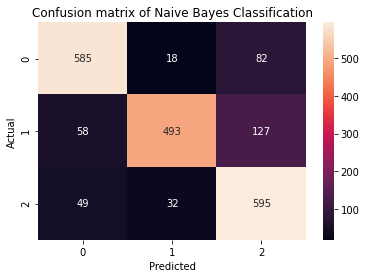

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(final[['Processed']], 
                                                    final['sentiment_type'], 
                                                    test_size=0.05, 
                                                    random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['Processed'])

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
# comment_matrix = vectorizer.fit_transform(x_train['content'])

from sklearn.naive_bayes import MultinomialNB
comment_classifier = MultinomialNB().fit(comment_matrix, y_train)

from sklearn import metrics
test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of Naive Bayes Classification")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# count vectorizing with unigram + bigram
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
#print('Average precision-recall score: {0:0.3f}'.format(
#      average_precision))

F1 score: 0.821
Precision score: 0.831
Recall score: 0.821


In [ ]:
from sklearn.model_selection import cross_val_score
import time
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='f1_weighted').mean()

print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)

Precision: 0.6889716198282134
Recall: 0.6449270125740714
F1 score: 0.6368010616026188


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
nfolds=3
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
degrees = [0, 1, 2, 3, 4, 5, 6]
kernels = ['rbf', 'linear', 'poly']
param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv = nfolds)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.25, 'kernel': 'poly'}

In [ ]:
from sklearn import svm

SVM = svm.SVC(C=1, kernel='poly', gamma=0.25, degree=1).fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = SVM.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[630,  25,  30],
       [  6, 670,   2],
       [ 35,  19, 622]])

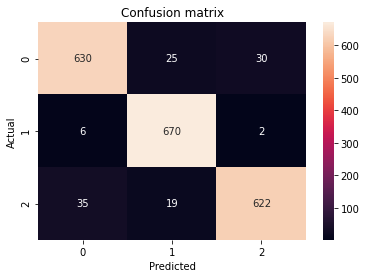

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

F1 score: 0.942
Precision score: 0.943
Recall score: 0.943


In [ ]:
from sklearn.model_selection import cross_val_score
import time
precision = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='f1_weighted').mean()

print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)

Precision: 0.7194005292818847
Recall: 0.7062207929854989
F1 score: 0.7026702861476002


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

metrics = ['euclidean', 'manhattan', 'cosine']
neighbors = list(range(1,30))
leaf_size = list(range(1,50))
weight = ['uniform', 'distance']
param_grid = {'metric' : metrics, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_model = KNeighborsClassifier(n_neighbors=1, metric='cosine', leaf_size=1, weights='uniform')
knn_model.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = knn_model.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[468, 187,  30],
       [ 29, 622,  27],
       [ 42, 238, 396]])

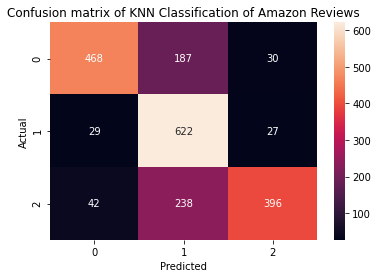

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of KNN Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

F1 score: 0.729
Precision score: 0.779
Recall score: 0.729


In [ ]:
from sklearn.model_selection import cross_val_score
import time
precision = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='f1_weighted').mean()

print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)

Precision: 0.5880934957777526
Recall: 0.51446138652021
F1 score: 0.5006843726027892


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier() 

param_grid = { 
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto','sqrt','log2']
}

grid_search = GridSearchCV(clf, param_grid, cv= 5)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

clf=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='auto')

comment_classifier = clf.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[517,  90,  78],
       [ 38, 598,  42],
       [ 68, 101, 507]])

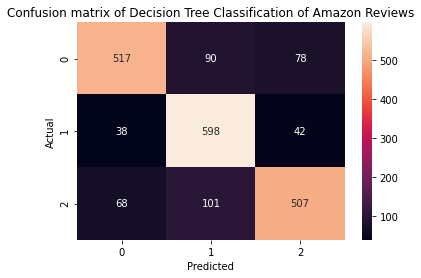

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of Decision Tree Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

F1 score: 0.795
Precision score: 0.799
Recall score: 0.795


In [ ]:
from sklearn.model_selection import cross_val_score
import time
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=20, scoring='precision_weighted').mean() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=20, scoring='recall_weighted').mean()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=20, scoring='f1_weighted').mean()

print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)

Precision: 0.6153616084773916
Recall: 0.5772762570374683
F1 score: 0.5696341827682913


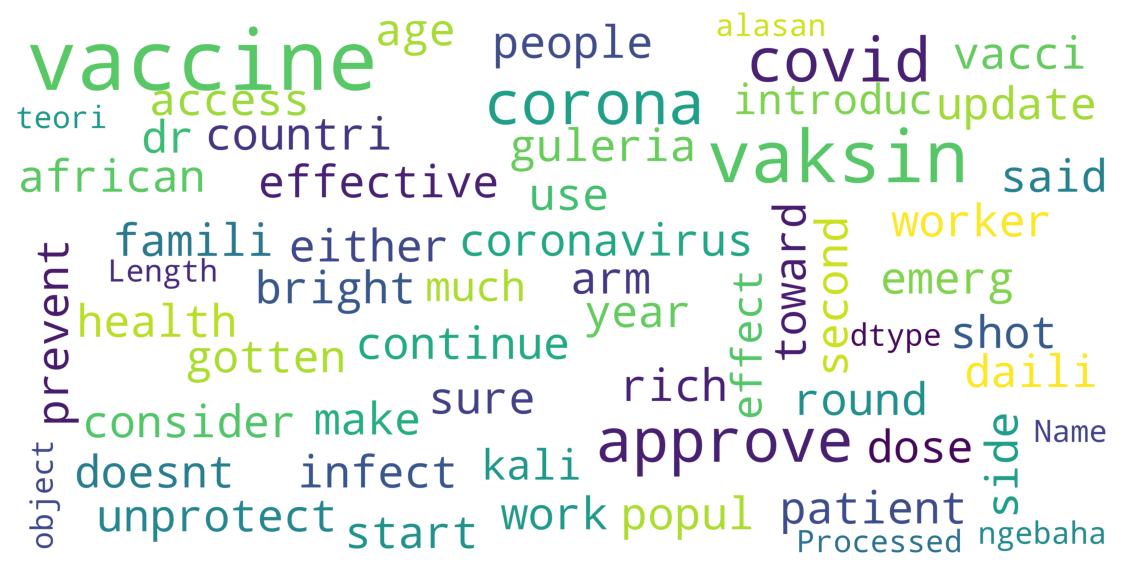

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 30, 
        scale = 10,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(final["Processed"])